In [1]:
library(Seurat)
seurat = readRDS('tumor_blood_integrated.RDS')

Warning message:
"package 'Seurat' was built under R version 4.1.3"
Attaching SeuratObject

Attaching sp



In [2]:
library(dplyr)
markers.all = readRDS('L:\\Duncan\\FlankCBT_figures/de_label.RDS')  %>%  mutate(gene = toupper(gene)) %>% filter(gene %in% rownames(seurat))
library(dplyr)
n = 10
names = c()
geneLists = list()
#markers.all = markers.all %>% filter(!cluster %in% c('Proliferating_1', 'Proliferating_2')) %>% group_by(gene) %>% top_n(1, wt = -log10(p_val_adj)) %>% ungroup() %>% arrange(p_val_adj) 
for (each in unique(markers.all$cluster)) {
    message(each)
    a = markers.all %>% filter(cluster == each, avg_log2FC > 0, p_val_adj < .001) %>% arrange(desc(avg_log2FC))
    a = toupper(a$gene[1:n])
    a = a[!is.na(a)]
    geneLists[[each]] = toupper(a)
}
seurat = AddModuleScore(seurat, features = geneLists, assay = 'RNA')

Warning message:
"package 'dplyr' was built under R version 4.1.3"

Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Pre-exhausted

Progenitor

Intermediate_1

Intermediate_2

Exhausted_1

Exhausted_2

Exhausted_KLR

IFN-responsive



In [3]:
library(Seurat)
library(ggplot2)
UMAP_theme <- theme_bw()+theme(axis.text.y = element_blank(), 
                               axis.text.x = element_blank(), 
                               axis.ticks.x= element_blank(),
                               axis.ticks.y= element_blank(),
                               axis.title.x= element_blank(),
                               axis.title.y= element_blank(),
                               strip.text.x = element_text(size = 8),
                               panel.grid.major = element_blank(),
                               panel.grid.minor = element_blank(),
                               panel.border = element_blank(),
                               panel.background = element_rect(colour = "black", fill = NA,size=.355),
                               legend.position = "none",
                               plot.title = element_text(hjust = 0.5, size = 8))

remove_grid = theme_bw() + theme( panel.grid.major = element_blank(),
                               panel.grid.minor = element_blank())

Axis_themes <- theme(plot.title = element_text(size = 8),
                     axis.title = element_text(size = 8), 
                     axis.text = element_text(size = 6),
                     axis.text.x = element_text(size = 6),
                     legend.text = element_text(size =6),
                     legend.title = element_text(size = 8),
                     strip.text.x = element_text(size = 8), 
                    axis.line = element_line(size = .355), 
                    axis.ticks = element_line(size = .177))


Warning message:
"package 'ggplot2' was built under R version 4.1.3"
Warning message:
"The `size` argument of `element_rect()` is deprecated as of ggplot2 3.4.0.
i Please use the `linewidth` argument instead."
Warning message:
"The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
i Please use the `linewidth` argument instead."


In [4]:
options(repr.plot.res = 300, repr.plot.width = 3, repr.plot.height = 3)

In [5]:
seurat$class_factor = factor(seurat$class, levels = c('Tn', 'Tm', 'Trm', 'Tem', 'Tex','Temra', 'Tk', 'ISG'))

library(ggthemes)
palette = tableau_color_pal('Jewel Bright')(9)
names(palette) = levels(seurat$class_factor)


In [6]:
options(repr.plot.res = 300, repr.plot.width = 2, repr.plot.height = 3)
data = seurat@meta.data[,paste0('Cluster', 1:8)] %>% as.data.frame()
colnames(data) = names(geneLists)
data$Patient = seurat@meta.data$patient
data$Cluster = seurat$class_factor
#data = data[seurat$loc == 'T',]
data = data[data$Cluster != 'MAIT',]
#data = data[data$Cluster != 'CD8.c01.Tn.MAL',]
#data = data[data$Cluster != 'Tn',]
#data = data[data$Cluster != 'Tk',]

#data[,1:8] = scale(data[,1:8])
#data = data[!is.na(data$Patient),]

data = data %>% group_by(Patient, Cluster) %>% filter(n() >0) %>% summarize_all(.funs = mean) %>% as.data.frame() %>% arrange((Cluster))#



rownames(data) = paste0(data$Patient, data$Cluster) 
meta = data[,1:2] %>% select(-Patient)
data = data[,-c(1,2)]
#data = scale(data) %>% t() %>% scale() %>% t()
data = scale(data)

library(pheatmap)
data[data > 2] = 2
data[data < -1 ] = -1
pheatmap(data, annotation_row = meta, show_rownames = FALSE, fontsize = 6, cluster_cols = FALSE, border_col = NA, cluster_rows = FALSE, annotation_color = list(Cluster = palette), filename = 'heatmap.pdf', height = 3, width = 2, 
         angle_col = 45)#,
         #color = colorRampPalette(c('blue', 'white', 'red'))(100))

Warning message:
"Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
i Please use `linewidth` instead."
Warning message:
"The `<scale>` argument of `guides()` cannot be `FALSE`. Use "none" instead as of ggplot2 3.3.4."


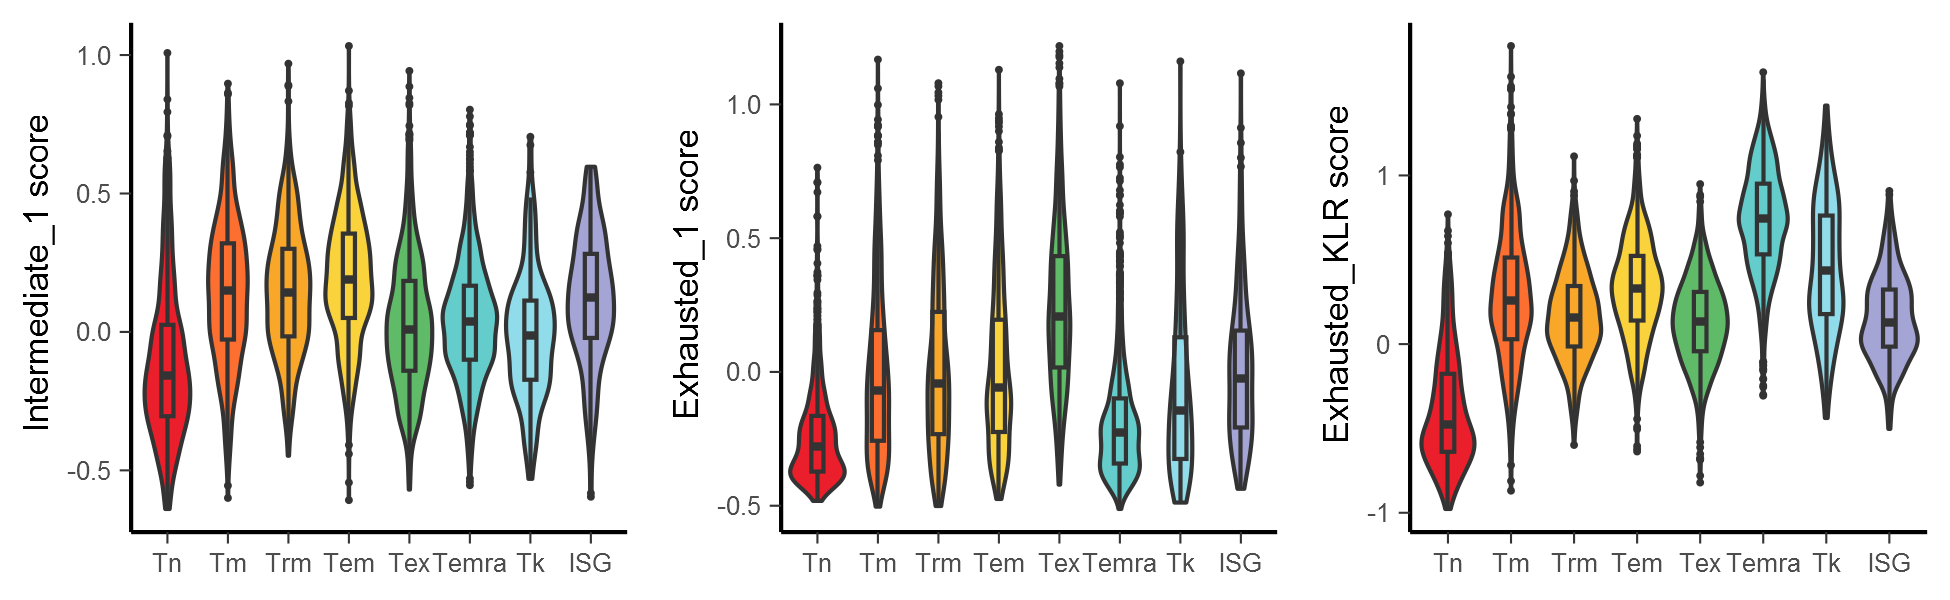

In [7]:
options(repr.plot.height = 2, repr.plot.width = 6.5)
g1 = ggplot(seurat@meta.data %>% filter(class != 'MAIT'), aes(x = class_factor, y = Cluster3)) + geom_violin(aes(fill = class), size = .355) + geom_boxplot(width = .2, fill = NA, outlier.size = 0, size = .355)  + scale_fill_manual(values = palette[1:9]) + theme_classic() + 
Axis_themes + labs(x = c(), y = 'Intermediate_1 score') + guides(fill = FALSE)

g2 = ggplot(seurat@meta.data %>% filter(class != 'MAIT'), aes(x = class_factor, y = Cluster5)) + geom_violin(aes(fill = class), size = .355) + geom_boxplot(width = .2, fill = NA, outlier.size = 0, size = .355)  + scale_fill_manual(values = palette[1:9]) + theme_classic() + 
Axis_themes + labs(x = c(), y = 'Exhausted_1 score') + guides(fill = FALSE)

g3 = ggplot(seurat@meta.data %>% filter(class != 'MAIT'), aes(x = class_factor, y = Cluster7)) + geom_violin(aes(fill = class), size = .355) + geom_boxplot(width = .2, fill = NA, outlier.size = 0, size = .355)  + scale_fill_manual(values = palette[1:9]) + theme_classic() + 
Axis_themes + labs(x = c(), y = 'Exhausted_KLR score') + guides(fill = FALSE)

cowplot::plot_grid(g1, g2, g3, ncol = 3)

ggsave('scores.pdf', height = 1.5, width = 6.8, useDingbats = FALSE)

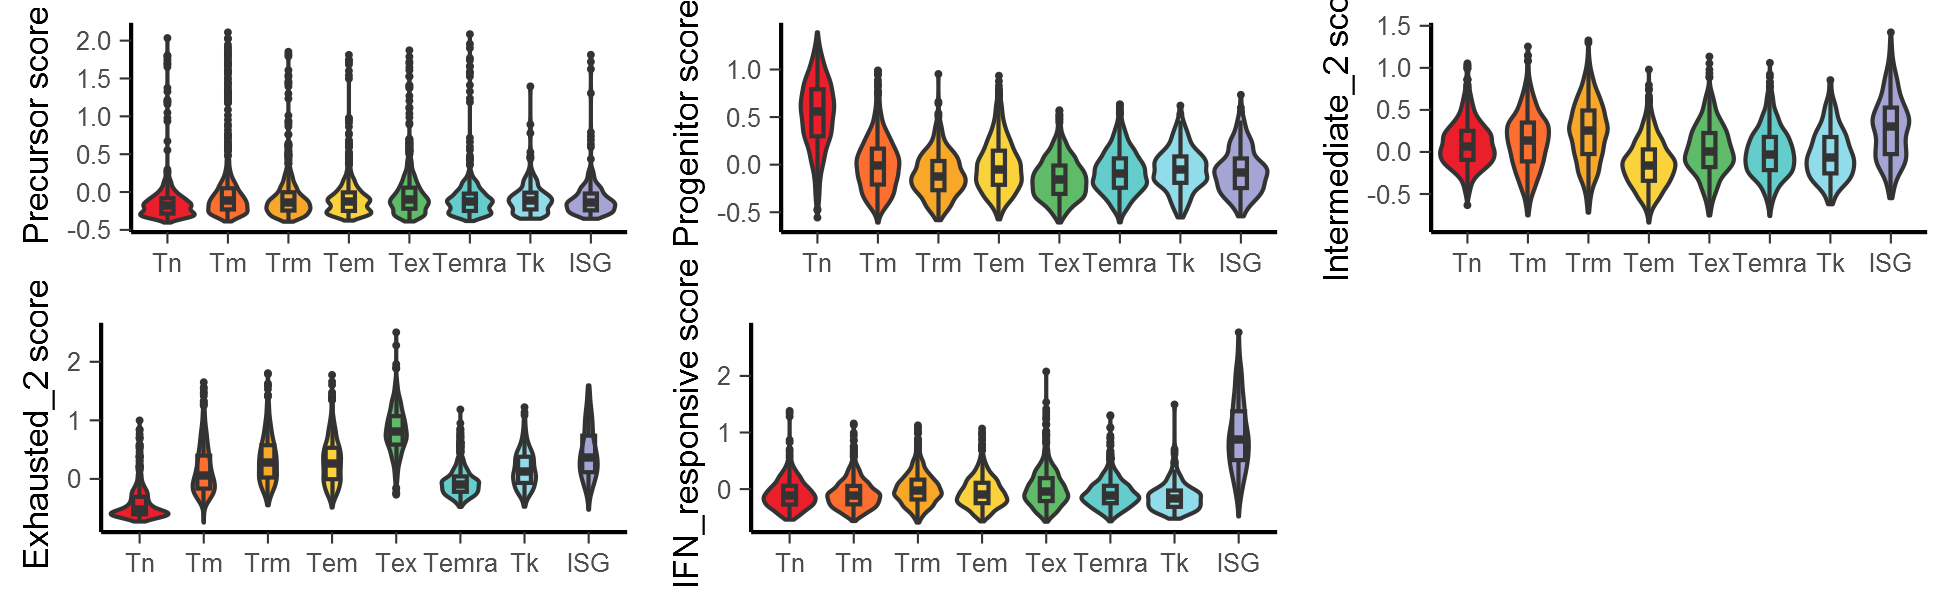

In [8]:
options(repr.plot.height = 2, repr.plot.width = 6.5)
g1 = ggplot(seurat@meta.data %>% filter(class != 'MAIT'), aes(x = class_factor, y = Cluster1)) + geom_violin(aes(fill = class), size = .355) + geom_boxplot(width = .2, fill = NA, outlier.size = 0, size = .355)  + scale_fill_manual(values = palette[1:9]) + theme_classic() + 
Axis_themes + labs(x = c(), y = 'Precursor score') + guides(fill = FALSE)

g2 = ggplot(seurat@meta.data %>% filter(class != 'MAIT'), aes(x = class_factor, y = Cluster2)) + geom_violin(aes(fill = class), size = .355) + geom_boxplot(width = .2, fill = NA, outlier.size = 0, size = .355)  + scale_fill_manual(values = palette[1:9]) + theme_classic() + 
Axis_themes + labs(x = c(), y = 'Progenitor score') + guides(fill = FALSE)

g3 = ggplot(seurat@meta.data %>% filter(class != 'MAIT'), aes(x = class_factor, y = Cluster4)) + geom_violin(aes(fill = class), size = .355) + geom_boxplot(width = .2, fill = NA, outlier.size = 0, size = .355)  + scale_fill_manual(values = palette[1:9]) + theme_classic() + 
Axis_themes + labs(x = c(), y = 'Intermediate_2 score') + guides(fill = FALSE)

g4 = ggplot(seurat@meta.data %>% filter(class != 'MAIT'), aes(x = class_factor, y = Cluster6)) + geom_violin(aes(fill = class), size = .355) + geom_boxplot(width = .2, fill = NA, outlier.size = 0, size = .355)  + scale_fill_manual(values = palette[1:9]) + theme_classic() + 
Axis_themes + labs(x = c(), y = 'Exhausted_2 score') + guides(fill = FALSE)

g5 = ggplot(seurat@meta.data %>% filter(class != 'MAIT'), aes(x = class_factor, y = Cluster8)) + geom_violin(aes(fill = class), size = .355) + geom_boxplot(width = .2, fill = NA, outlier.size = 0, size = .355)  + scale_fill_manual(values = palette[1:9]) + theme_classic() + 
Axis_themes + labs(x = c(), y = 'IFN_responsive score') + guides(fill = FALSE)

cowplot::plot_grid(g1, g2, g3, g4, g5, ncol = 3)

ggsave('scores_supplement.pdf', height = 3, width = 6.8, useDingbats = FALSE)

In [9]:
library(stringr)
tcr = readRDS('L:/Duncan/Literature Data/Zheng/TCR/data/byCell/tcr.zhangLab.comb.flt.rds')
tcr$lin = sapply(tcr$meta.cluster.coarse, function(x) stringr::str_split(x, fixed('.'))[[1]][1])
tumor_clones = unique(tcr$cloneID[tcr$loc == 'T' ])#& tcr$meta.cluster %in% tumor_reactive])
tcr$tumor_clone = tcr$cloneID %in% tumor_clones
tcr$cellID.uniq = paste0(tcr$dataset.old,'.', tcr$Cell_Name)
                 
                 

In [10]:
tcr$class = sapply(tcr$meta.cluster, function(x) str_split(x, fixed('.'))[[1]][3])
blood_patients = tcr$patient[tcr$loc == 'P'] %>% unique()


`summarise()` has grouped output by 'patient', 'dataset', 'lin', 'tumor_clone'. You can override using the `.groups` argument.
Warning message in check_pal_n(n, max_n):
"This palette can handle a maximum of 9 values.You have supplied 10."
Warning message in wilcox.test.default(c(0, 0.294117647058824, 0.0588235294117647, :
"cannot compute exact p-value with zeroes"
Warning message in wilcox.test.default(c(0, 0.117647058823529, 0.0882352941176471, :
"cannot compute exact p-value with zeroes"
Warning message in wilcox.test.default(c(0.296296296296296, 0.352941176470588, 0.0882352941176471, :
"cannot compute exact p-value with zeroes"
Warning message in wilcox.test.default(c(0.037037037037037, 0, 0, 0, 0, 0, 0, 0, :
"cannot compute exact p-value with zeroes"
Warning message in wilcox.test.default(c(0, 0, 0, 0, 0.03125, 0.0232558139534884, :
"cannot compute exact p-value with ties"
Warning message in wilcox.test.default(c(0, 0, 0, 0, 0.03125, 0.0232558139534884, :
"cannot compute exact p-va

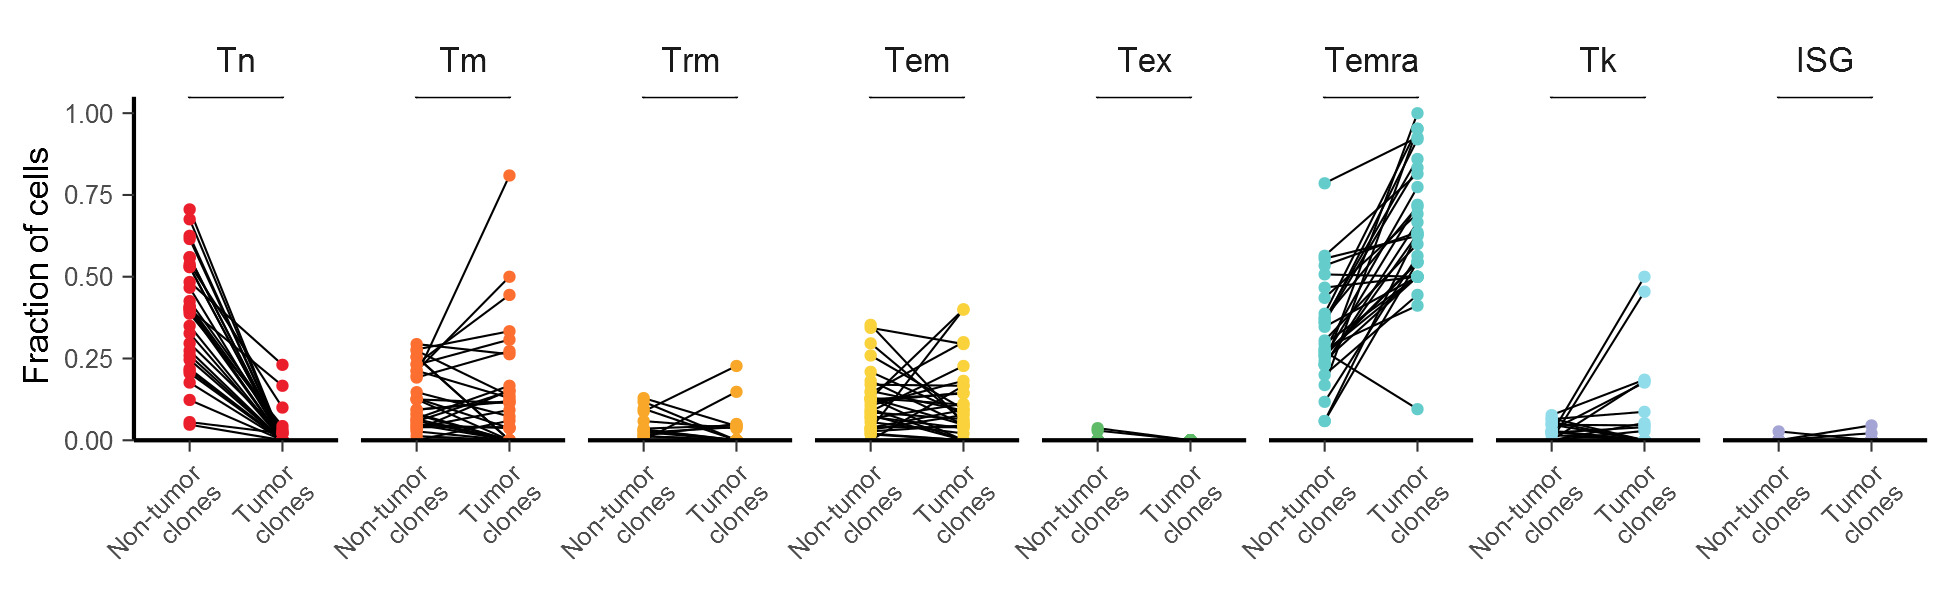

In [11]:
library(ggpubr)
options(repr.plot.height = 2)
tcr$class = as.character(tcr$class)

sub =  tcr %>% filter(patient %in% blood_patients, lin == 'CD8', loc == 'P',class != 'MAIT',!is.na(cloneID), 
                    dataset != 'BCL.thisStudy', dataset != "MM.thisStudy", patient != 'LUNG.P1208', patient != 'LUNG.P1219') %>%  group_by(patient,  dataset, lin, tumor_clone,  class) %>% 
summarize(n = n()) %>% mutate(p = n/sum(n))
sub$class = factor(sub$class)
sub = sub %>%group_by(patient,  dataset, lin, tumor_clone) %>%  tidyr::complete(class, fill = list(p = 0))


sub$class = factor(sub$class, levels = c('Tn', 'Tm', 'Trm', 'Tem', 'Tex','Temra', 'Tk', 'ISG'))
library(ggthemes)
palette = tableau_color_pal('Jewel Bright')(10)
names(palette) = levels(sub$class)

#sub$tumor_clone = factor(sub$)
g1 = ggplot(sub, aes(x = factor(tumor_clone), y = p)) + geom_line(aes(group = patient), size = .177) + geom_point(size = .5, aes(color = class)) +  facet_wrap('class', ncol = 8) + 
 theme_classic() +
labs(x = c(), y = 'Fraction of cells') + Axis_themes + scale_y_continuous(expand = c(0,0)) + 
scale_x_discrete(labels = c('Non-tumor\nclones', 'Tumor\nclones')) + theme(axis.text.x = element_text(angle = 45, hjust = 1), strip.background = element_blank())  + 
stat_compare_means( comparison = list(c(1,2)), paired = TRUE, tip.length = 0, label = 'p.signif') + scale_color_manual(values = palette) + guides(color = FALSE)
g1$layers[[3]]$aes_params$textsize <- 2.1167 
g1

ggsave('tumor_clone.pdf', height = 1.7, width = 6, useDingbats = FALSE)

#ggplot(sub, aes(x = factor(class), y = p, group = factor(tumor_clone), fill = class)) + geom_point(position = position_jitterdodge(dodge.width = .8, jitter.width = .5)) + labs(y = 'Fraction of cells') +

In [12]:
temra_clone = tcr$cloneID[tcr$loc == 'P' & tcr$class== 'Temra']
temra_clone = temra_clone[!is.na(temra_clone)]

tcr$temra_blood = as.numeric(tcr$cloneID %in% temra_clone)

blood_clone = tcr$cloneID[tcr$loc == 'P']
blood_clone = blood_clone[!is.na(blood_clone)]

tcr$blood_clone = as.numeric(tcr$cloneID %in% blood_clone)

`summarise()` has grouped output by 'patient', 'dataset', 'lin', 'temra_blood'. You can override using the `.groups` argument.
Warning message:
"`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead."
Warning message in wilcox.test.default(c(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0714285714285714, :
"cannot compute exact p-value with ties"
Warning message in wilcox.test.default(c(0.2, 0, 1, 0, 0.5, 0, 0, 0, 0, 0, 0, 0.214285714285714, :
"cannot compute exact p-value with ties"
Warning message in wilcox.test.default(c(0, 0, 0, 0, 0, 0, 0, 0.25, 0, 0, 0.5, 0.0714285714285714, :
"cannot compute exact p-value with ties"
Warning message in wilcox.test.default(c(0.6, 1, 0, 1, 0.5, 1, 1, 0.75, 0, 0, 0.333333333333333, :
"cannot compute exact p-value with ties"
Warning message in wilcox.test.default(c(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, :
"cannot compute exact p-value with ties"
Warning message in wilcox.test.default(c(0.2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.166666666

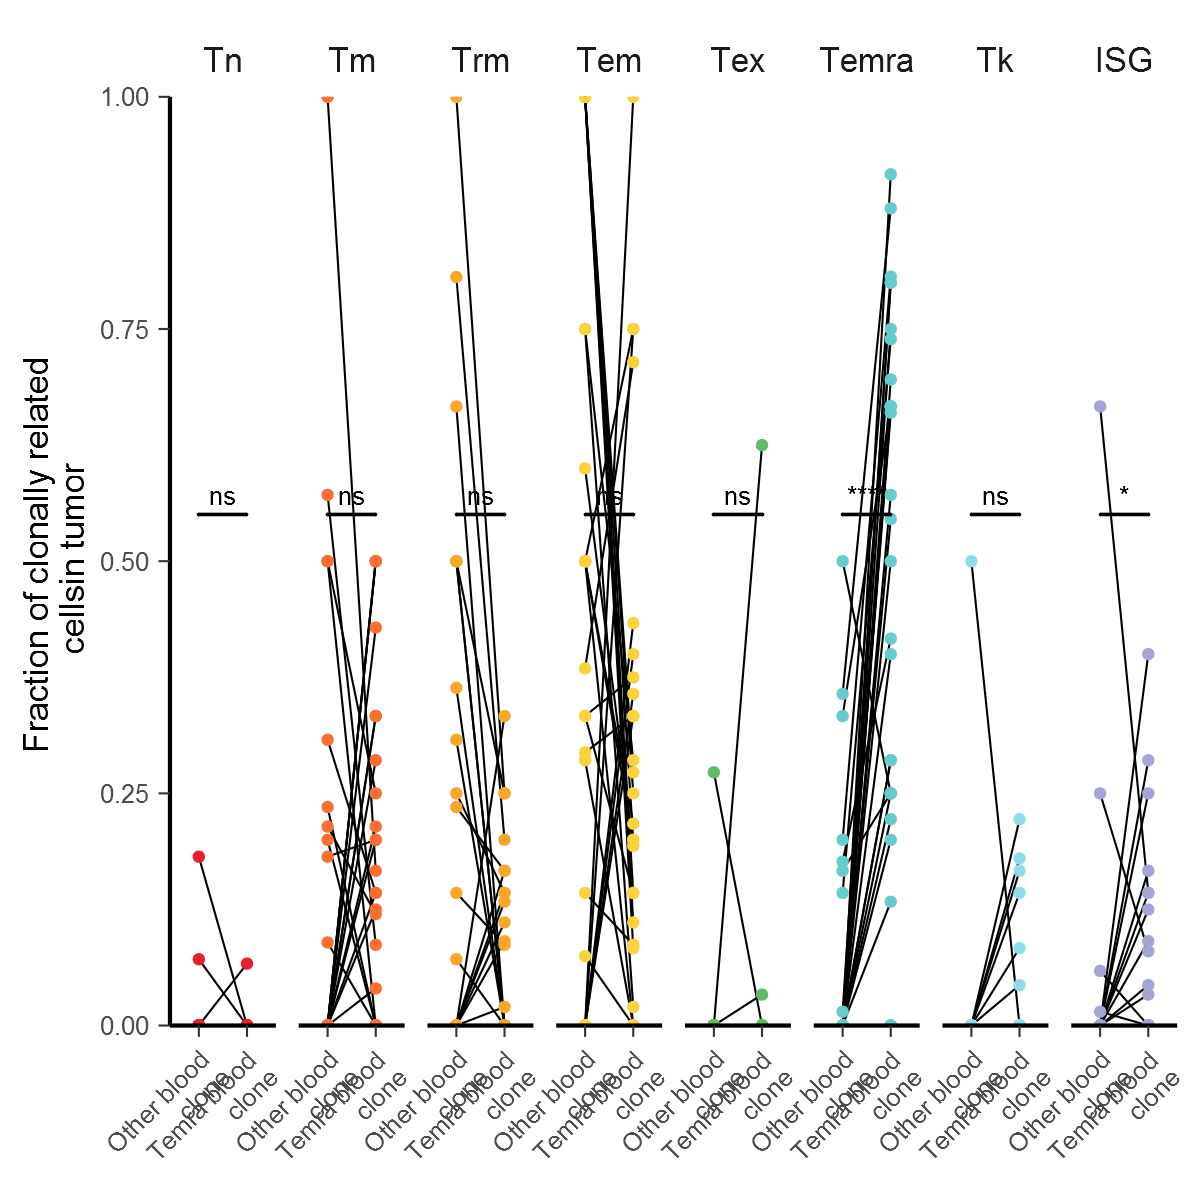

In [271]:
library(tidyr)
sub =  tcr %>% filter(patient %in% blood_patients, lin == 'CD8', class != 'MAIT', loc == 'T', blood_clone == 1, 
                    dataset != 'BCL.thisStudy', dataset != "MM.thisStudy", patient != 'LUNG.P1208', patient != 'LUNG.P1219') %>%  group_by(patient,  dataset, lin, temra_blood,  class) %>% 
summarize(n = n()) %>% mutate(p = n/sum(n))
sub$class = factor(sub$class, levels = c('Tn', 'Tm', 'Trm', 'Tem', 'Tex','Temra', 'Tk', 'ISG'))
sub$temra_blood = factor(sub$temra_blood)
sub = sub %>%group_by(patient,  dataset, lin)  %>%  tidyr::complete(class, temra_blood, fill = list(p = 0))
pd = position_dodge(width = 0)


g1 = ggplot(sub, aes(x = factor(temra_blood), y = p, group = patient)) + geom_line(aes(group = patient), size = .177, position = pd) + geom_point(size = .5, aes(color = class), position = pd) +  facet_wrap('class', ncol = 8) + 
 theme_classic() +
labs(x = c(), y = 'Fraction of clonally related\ncellsin tumor') + Axis_themes + scale_y_continuous(expand = c(0,0)) + 
scale_x_discrete(labels = c('Other blood\nclone', 'Temra blood\nclone')) + theme(axis.text.x = element_text(angle = 45, hjust = 1), strip.background = element_blank())  + 
stat_compare_means( comparison = list(c(1,2)), paired = FALSE, tip.length = 0, label = 'p.signif', label.y = .5) + scale_color_manual(values = palette) + guides(color = FALSE)
g1$layers[[3]]$aes_params$textsize <- 2.1167
g1

ggsave('temra_clone.pdf', height = 1.7, width = 6, useDingbats = FALSE)


`summarise()` has grouped output by 'patient', 'dataset', 'lin', 'temra_blood'. You can override using the `.groups` argument.
Warning message:
"`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead."
Warning message in wilcox.test.default(c(0.0285714285714286, 0, 0.0172413793103448, :
"cannot compute exact p-value with ties"
Warning message in wilcox.test.default(c(0.0857142857142857, 0.146666666666667, :
"cannot compute exact p-value with ties"
Warning message in wilcox.test.default(c(0.0571428571428571, 0.0666666666666667, :
"cannot compute exact p-value with ties"
Warning message in wilcox.test.default(c(0.20952380952381, 0.133333333333333, 0.310344827586207, :
"cannot compute exact p-value with ties"
Warning message in wilcox.test.default(c(0.457142857142857, 0.64, 0.137931034482759, :
"cannot compute exact p-value with ties"
Warning message in wilcox.test.default(c(0.0380952380952381, 0.0133333333333333, :
"cannot compute exact p-value with ties"


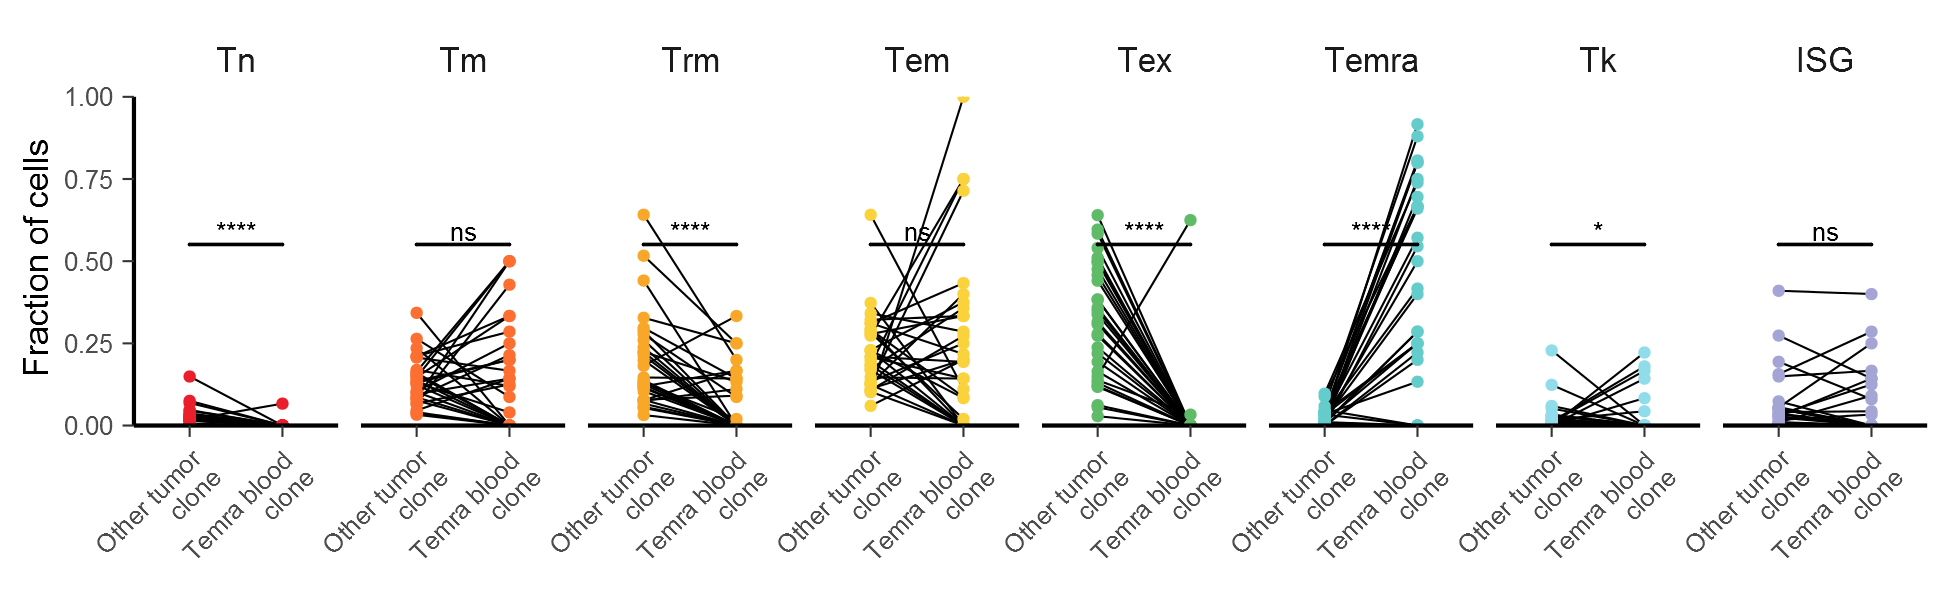

In [14]:
library(tidyr)
sub =  tcr %>% filter(patient %in% blood_patients, lin == 'CD8', class != 'MAIT', loc == 'T', 
                    dataset != 'BCL.thisStudy', dataset != "MM.thisStudy", patient != 'LUNG.P1208', patient != 'LUNG.P1219') %>%  group_by(patient,  dataset, lin, temra_blood,  class) %>% 
summarize(n = n()) %>% mutate(p = n/sum(n))
sub$class = factor(sub$class, levels = c('Tn', 'Tm', 'Trm', 'Tem', 'Tex','Temra', 'Tk', 'ISG'))
sub$temra_blood = factor(sub$temra_blood)
sub = sub %>%group_by(patient,  dataset, lin)  %>%  tidyr::complete(class, temra_blood, fill = list(p = 0))
pd = position_dodge(width = 0)


g1 = ggplot(sub, aes(x = factor(temra_blood), y = p, group = patient)) + geom_line(aes(group = patient), size = .177, position = pd) + geom_point(size = .5, aes(color = class), position = pd) +  facet_wrap('class', ncol = 8) + 
 theme_classic() +
labs(x = c(), y = 'Fraction of cells') + Axis_themes + scale_y_continuous(expand = c(0,0)) + 
scale_x_discrete(labels = c('Other tumor\nclone', 'Temra blood\nclone')) + theme(axis.text.x = element_text(angle = 45, hjust = 1), strip.background = element_blank())  + 
stat_compare_means( comparison = list(c(1,2)), paired = FALSE, tip.length = 0, label = 'p.signif', label.y = .5) + scale_color_manual(values = palette) + guides(color = FALSE)
g1$layers[[3]]$aes_params$textsize <- 2.1167
g1

ggsave('temra_clone.pdf', height = 1.7, width = 6, useDingbats = FALSE)


`summarise()` has grouped output by 'patient', 'loc'. You can override using the `.groups` argument.
Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.

Warning message:
"`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead."
Warning message in wilcox.test.default(c(0.02, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, :
"cannot compute exact p-value with zeroes"
Warning message in wilcox.test.default(c(0, 0.0526315789473684, 0, 0.0285714285714286, :
"cannot compute exact p-value with ties"
Warning message in wilcox.test.default(c(0, 0.0526315789473684, 0, 0.0285714285714286, :
"cannot compute exact p-value with zeroes"
Warning message in wilcox.test.default(c(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0454545454545455, :
"cannot compute exact p-value with zeroes"
Warning message in wilcox.test.default(c(0.02, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, :
"cannot compute exact p-value with zeroes"
Warning message in wilcox.test

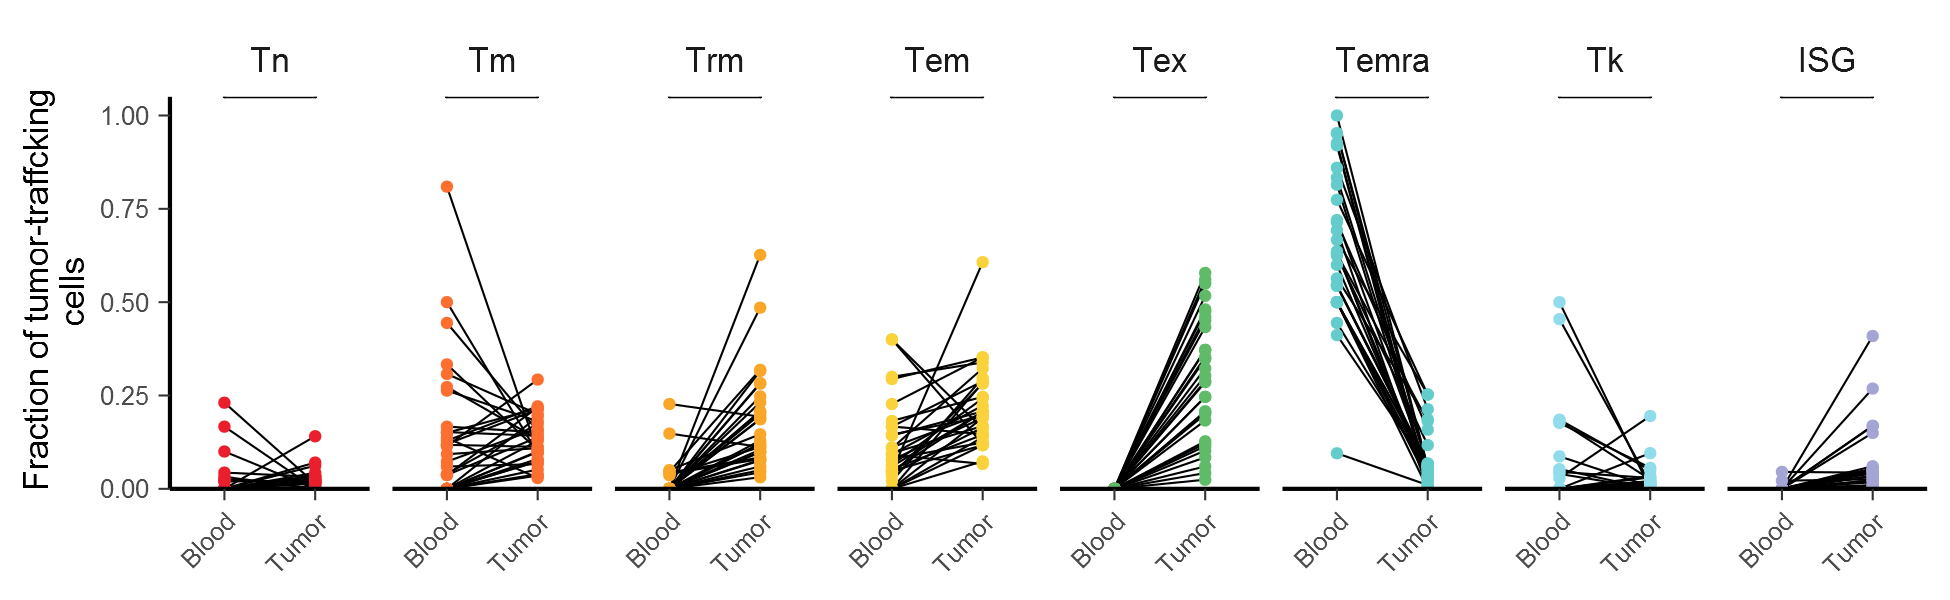

In [15]:
a = tcr %>% filter(patient %in% blood_patients, lin == 'CD8',  dataset != 'BCL.thisStudy', dataset != "MM.thisStudy", tumor_clone == 1, loc != 'N', class != 'MAIT', patient != 'LUNG.P1208', patient != 'LUNG.P1219' ) %>% 
group_by(patient, loc, class) %>% summarize(n = n()) %>% mutate(p = n/sum(n))

a$class = factor(a$class, levels = c('Tn', 'Tm', 'Trm', 'Tem', 'Tex','Temra', 'Tk', 'ISG'))
a = a%>% group_by(patient, loc) %>% tidyr::complete(class, fill = list(p = 0))

g1 = ggplot(a, aes(x = loc, y =p, group = patient)) + geom_line(size = .177) + geom_point(size = .5,aes(color = class)) + facet_wrap('class', ncol = 8) + theme_classic() +
scale_color_manual(values = palette) + Axis_themes + stat_compare_means( comparison = list(c(1,2)), paired = TRUE, tip.length = 0, label = 'p.signif') + scale_color_manual(values = palette) + guides(color = FALSE) +
theme( strip.background = element_blank()) + labs(x = c(), y = 'Fraction of tumor-traffcking\ncells') + scale_x_discrete(labels = c('Blood', 'Tumor')) + theme(axis.text.x = element_text(angle = 45, hjust = 1)) + 
scale_y_continuous(expand = c(0,0))
g1$layers[[3]]$aes_params$textsize <- 2.1167
g1
ggsave('tumor_freqs.pdf', height = 1.7, width = 6, useDingbats = FALSE)


In [16]:
tcr_frac = tcr %>% filter(loc == 'T', patient %in% blood_patients) %>% group_by(patient, dataset, loc, cloneID) %>% summarize(n =n()) %>% mutate(p = n/sum(n))
head(tcr_frac)

tcr$tumor_frac = tcr_frac$p[match(tcr$cloneID, tcr_frac$cloneID)]


`summarise()` has grouped output by 'patient', 'dataset', 'loc'. You can override using the `.groups` argument.


patient,dataset,loc,cloneID,n,p
<chr>,<chr>,<chr>,<chr>,<int>,<dbl>
CHOL.P0216,CHOL.thisStudy,T,CHOL.P0216_C000001:3,2,0.009478673
CHOL.P0216,CHOL.thisStudy,T,CHOL.P0216_C000002:2,1,0.004739336
CHOL.P0216,CHOL.thisStudy,T,CHOL.P0216_C000007:1,1,0.004739336
CHOL.P0216,CHOL.thisStudy,T,CHOL.P0216_C000008:1,1,0.004739336
CHOL.P0216,CHOL.thisStudy,T,CHOL.P0216_C000010:5,5,0.023696682
CHOL.P0216,CHOL.thisStudy,T,CHOL.P0216_C000012:1,1,0.004739336


In [17]:
a = tcr %>% filter(patient %in% blood_patients, lin == 'CD8',  loc != 'N', dataset != 'BCL.thisStudy', dataset != "MM.thisStudy" )
a$class[a$class %in% c('ISG', 'MAIT', 'Tex', 'Tk', 'Tn')] = 'Other'
a$class = factor(a$class, levels =c( 'Tm', 'Trm', 'Tem', 'Temra', 'Other'))

sub = a %>% filter(patient %in% blood_patients, lin == 'CD8', class != 'MAIT', loc == 'P',
                
                    dataset != 'BCL.thisStudy', dataset != "MM.thisStudy") %>%  group_by(patient, dataset, class, lin, cloneID) %>% summarize(n=n(), tumor_clone = tumor_clone[1], tumor_frac = tumor_frac[1])%>%   group_by(patient, dataset,  lin) %>%
mutate(blood_frac= n/sum(n)) %>% filter(tumor_clone == 1)

`summarise()` has grouped output by 'patient', 'dataset', 'class', 'lin'. You can override using the `.groups` argument.


Warning message:
"package 'ggbeeswarm' was built under R version 4.1.3"


[1] 3.314174

Warning message:
"`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead."
Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.



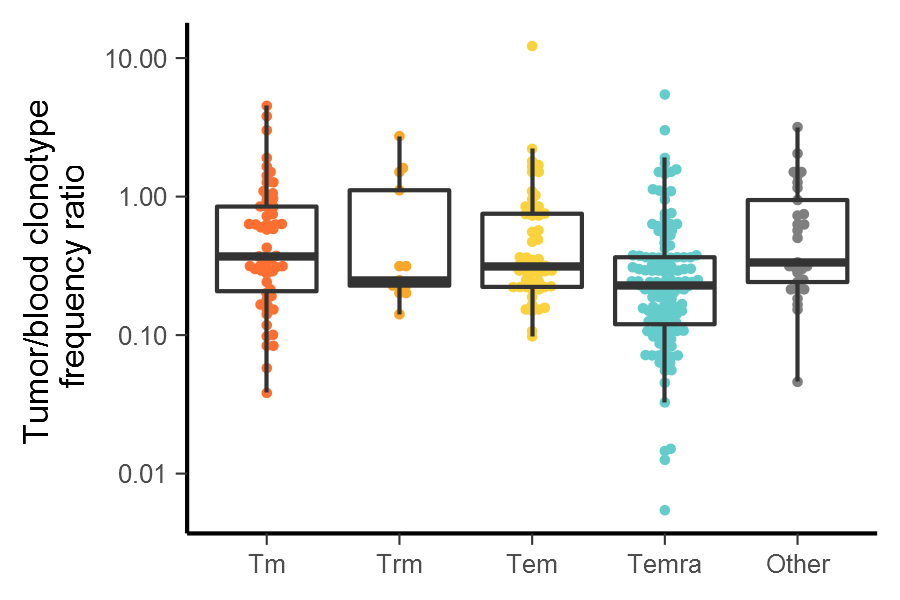

In [18]:
options(repr.plot.width =3)
library(ggpubr)
library(ggbeeswarm)
sub = sub %>% mutate(rat = tumor_frac/blood_frac)
sum(sub$tumor_frac)
ggplot(sub %>% filter(tumor_frac > 0) %>% filter(!class %in% c('ISG', 'Tn', 'Tk')), aes(x = class, y = rat))+ geom_beeswarm(aes(color = class), size = .3)  + geom_boxplot(alpha = 0, size = .355)  +# stat_compare_means(comparison = list(c(1,2), c(2,3), c(2,4)))  + 
scale_y_log10() + 
labs(y = 'Tumor/blood clonotype\nfrequency ratio') + theme_classic() +
theme(axis.text.x = element_text(angle = 0, hjust = .5), strip.background = element_blank())  + Axis_themes+
 scale_color_manual(values = palette) + guides(color = FALSE) + scale_color_manual(values = palette) + labs(x = c())
g1$layers[[3]]$aes_params$textsize <- 2.1167 

ggsave('clone_Freqs.pdf', height = 2, width = 2.3, useDingbats = FALSE)


In [19]:
library(FSA)
kruskal.test(rat~class, data = sub)
a = dunnTest(rat~class, data = sub %>% filter(!class %in% c('ISG', 'Tn', 'Tk')))
a

Warning message:
"package 'FSA' was built under R version 4.1.3"
Registered S3 methods overwritten by 'FSA':
  method       from
  confint.boot car 
  hist.boot    car 

## FSA v0.9.3. See citation('FSA') if used in publication.
## Run fishR() for related website and fishR('IFAR') for related book.




	Kruskal-Wallis rank sum test

data:  rat by class
Kruskal-Wallis chi-squared = 29.166, df = 4, p-value = 7.234e-06


Dunn (1964) Kruskal-Wallis multiple comparison

  p-values adjusted with the Holm method.




      Comparison          Z      P.unadj        P.adj
1    Other - Tem  0.4416623 6.587336e-01 1.0000000000
2  Other - Temra  3.4796358 5.020958e-04 0.0040167667
3    Tem - Temra  3.7915687 1.496987e-04 0.0013472883
4     Other - Tm  0.3408196 7.332394e-01 1.0000000000
5       Tem - Tm -0.1294885 8.969711e-01 0.8969711097
6     Temra - Tm -4.0680702 4.740411e-05 0.0004740411
7    Other - Trm  0.5501086 5.822449e-01 1.0000000000
8      Tem - Trm  0.2652102 7.908475e-01 1.0000000000
9    Temra - Trm -1.8201542 6.873553e-02 0.4811486993
10      Tm - Trm  0.3470117 7.285825e-01 1.0000000000

In [20]:
colnames(tcr)

[1] "patient"             "Cell_Name"           "cloneID"            
 [4] "cloneStatus"         "CDR3.A1"             "CDR3.A2"            
 [7] "CDR3.B1"             "CDR3.B2"             "Identifier.A1"      
[10] "Identifier.A2"       "Identifier.B1"       "Identifier.B2"      
[13] "Exp.A1"              "Exp.A2"              "Exp.B1"             
[16] "Exp.B2"              "Tech"                "meta.cluster"       
[19] "meta.cluster.coarse" "ClusterID.harmony"   "miniCluster"        
[22] "cancerType"          "loc"                 "libraryID"          
[25] "batchV"              "dataset"             "dataset.old"        
[28] "stype"               "cloneSize"           "cluster.name"       
[31] "invariantA"          "lin"                 "tumor_clone"        
[34] "cellID.uniq"         "class"               "temra_blood"        
[37] "blood_clone"         "tumor_frac"

In [21]:
table(tcr$meta.cluster)


       CD8.c01.Tn.MAL       CD8.c02.Tm.IL7R      CD8.c03.Tm.RPS12 
                 6036                 13026                  3054 
      CD8.c04.Tm.CD52     CD8.c05.Tem.CXCR5      CD8.c06.Tem.GZMK 
                 5034                 13992                  4300 
 CD8.c07.Temra.CX3CR1     CD8.c08.Tk.TYROBP    CD8.c09.Tk.KIR2DL4 
                10327                   602                  1545 
   CD8.c10.Trm.ZNF683     CD8.c11.Tex.PDCD1    CD8.c12.Tex.CXCL13 
                17283                  2804                  9647 
   CD8.c13.Tex.myl12a      CD8.c14.Tex.TCF7     CD8.c15.ISG.IFIT1 
                  386                   652                  2388 
 CD8.c16.MAIT.SLC4A10       CD8.c17.Tm.NME1       CD4.c01.Tn.TCF7 
                 3046                   557                  9471 
      CD4.c02.Tn.PASK       CD4.c03.Tn.ADSL       CD4.c04.Tn.il7r 
                  841                   542                   521 
       CD4.c05.Tm.TNF      CD4.c06.Tm.ANXA1      CD4.c07.Tm.A

In [22]:
tcr$pheno_diffuse = paste0(tcr$loc, tcr$class)
sub = tcr %>%   filter(patient %in% blood_patients, lin == 'CD8',  dataset != 'BCL.thisStudy', dataset != "MM.thisStudy", tumor_clone == 1, loc != 'N', class != 'MAIT', patient != 'LUNG.P1208', patient != 'LUNG.P1219' )

In [189]:
colnames(tcr)

[1] "patient"             "Cell_Name"           "cloneID"            
 [4] "cloneStatus"         "CDR3.A1"             "CDR3.A2"            
 [7] "CDR3.B1"             "CDR3.B2"             "Identifier.A1"      
[10] "Identifier.A2"       "Identifier.B1"       "Identifier.B2"      
[13] "Exp.A1"              "Exp.A2"              "Exp.B1"             
[16] "Exp.B2"              "Tech"                "meta.cluster"       
[19] "meta.cluster.coarse" "ClusterID.harmony"   "miniCluster"        
[22] "cancerType"          "loc"                 "libraryID"          
[25] "batchV"              "dataset"             "dataset.old"        
[28] "stype"               "cloneSize"           "cluster.name"       
[31] "invariantA"          "lin"                 "tumor_clone"        
[34] "cellID.uniq"         "class"               "temra_blood"        
[37] "blood_clone"         "tumor_frac"          "pheno_diffuse"

In [262]:
sub = tcr %>%   filter(patient %in% blood_patients, lin == 'CD8',  dataset != 'BCL.thisStudy', dataset != "MM.thisStudy", tumor_clone == 1, blood_clone == 1, loc != 'N', class != 'MAIT', patient != 'LUNG.P1208', patient != 'LUNG.P1219', cloneSize > 0 )
ids = unique(sub$pheno_diffuse)
ids = ids[order(ids)]

mat = matrix(0, length(ids), length(ids)) 
rownames(mat) = ids
colnames(mat) = ids
for (curr in ids) {
    tcra = sub %>% filter(pheno_diffuse == curr) 
    tcra = tcra$cloneID
    #tcra = unique(tcra$cloneID)
    for (other in ids) {
        tcrb = sub %>% filter(pheno_diffuse == other)
        #tcrb = unique(tcrb$cloneID)
        tcrb = (tcrb$cloneID)
        overlap = sum(tcra %in% tcrb)
        mat[curr, other] = overlap/sqrt(length(tcra)*length(tcrb))
        if (curr == other) {
            #mat[curr, other]= 0
        }
    }
}

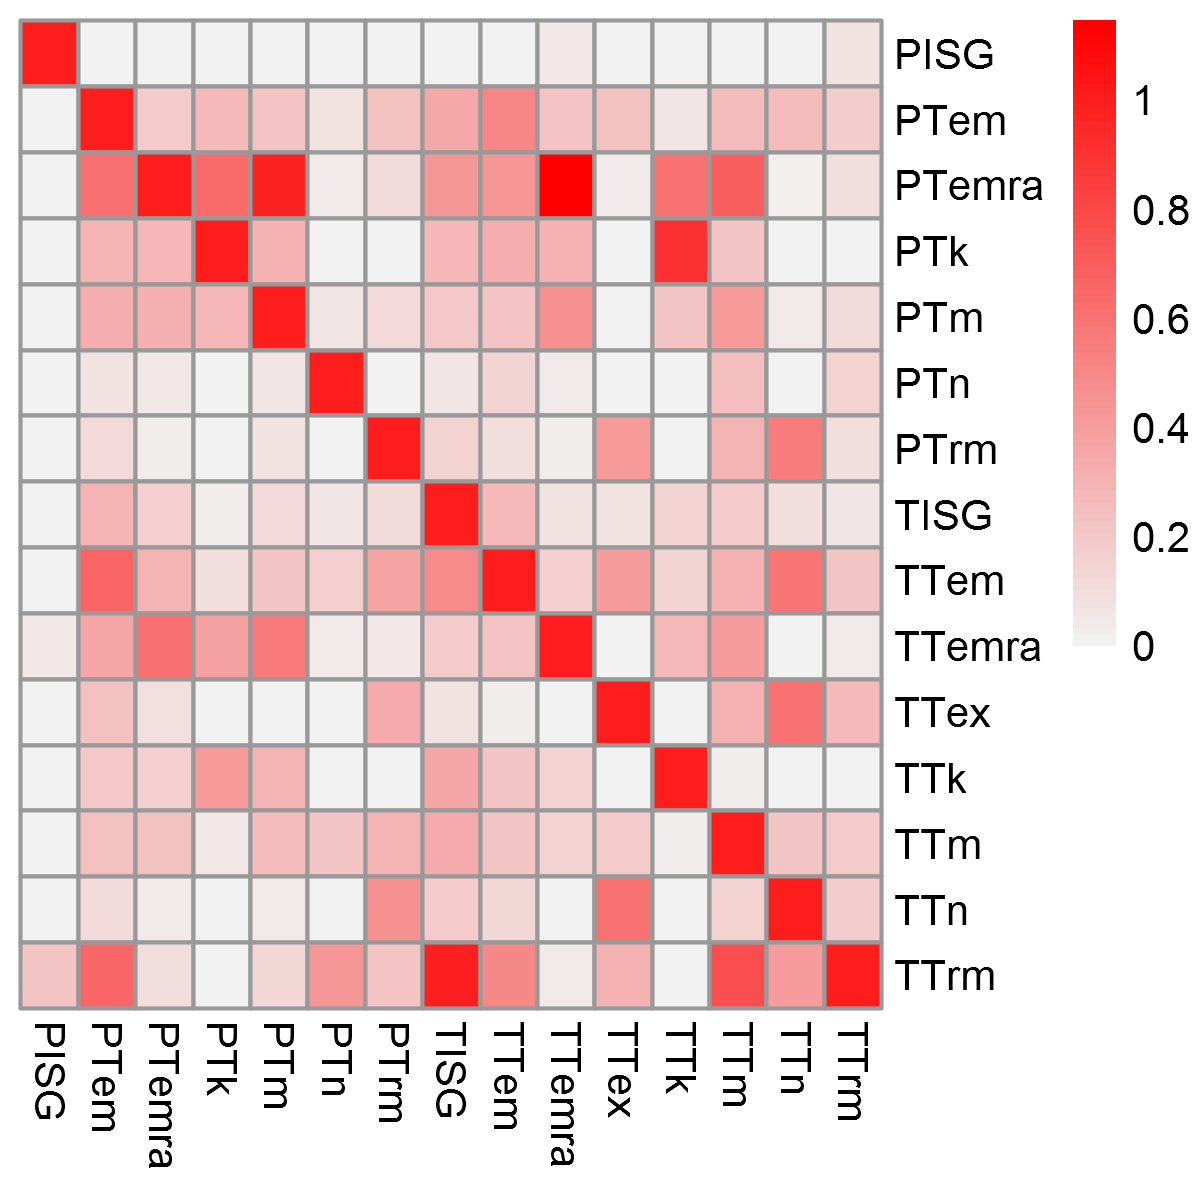

In [263]:
pheatmap(mat, cluster_rows = FALSE, cluster_cols = FALSE, color = colorRampPalette(c('grey95', 'red'))(100))

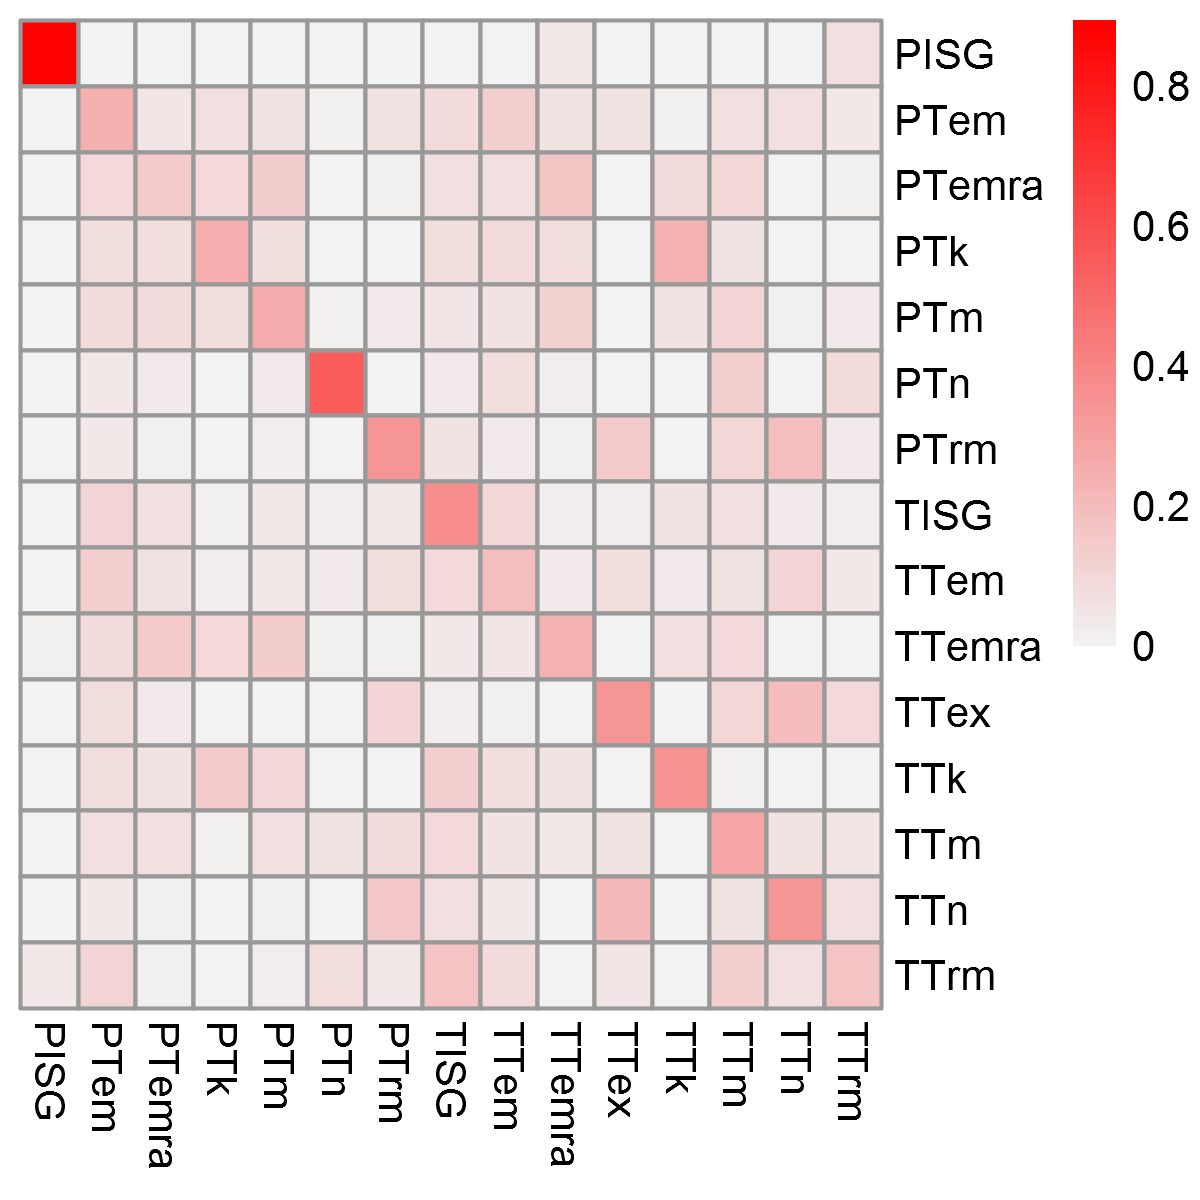

In [264]:
a = mat/rowSums(mat)
pheatmap(a, cluster_rows = FALSE, cluster_cols = FALSE, color = colorRampPalette(c('grey95', 'red'))(100))

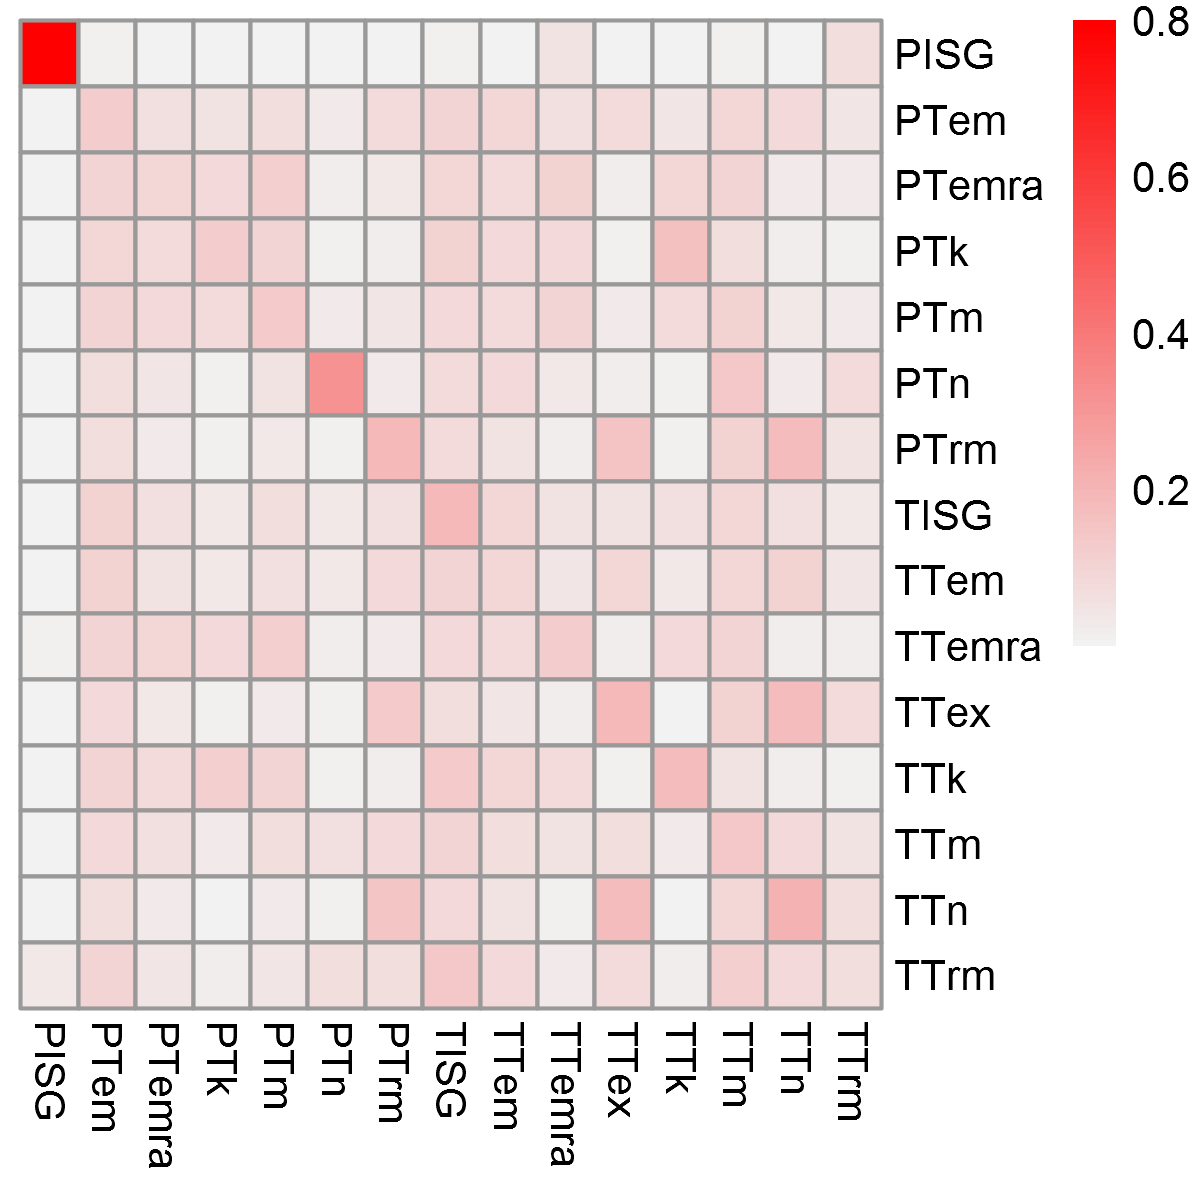

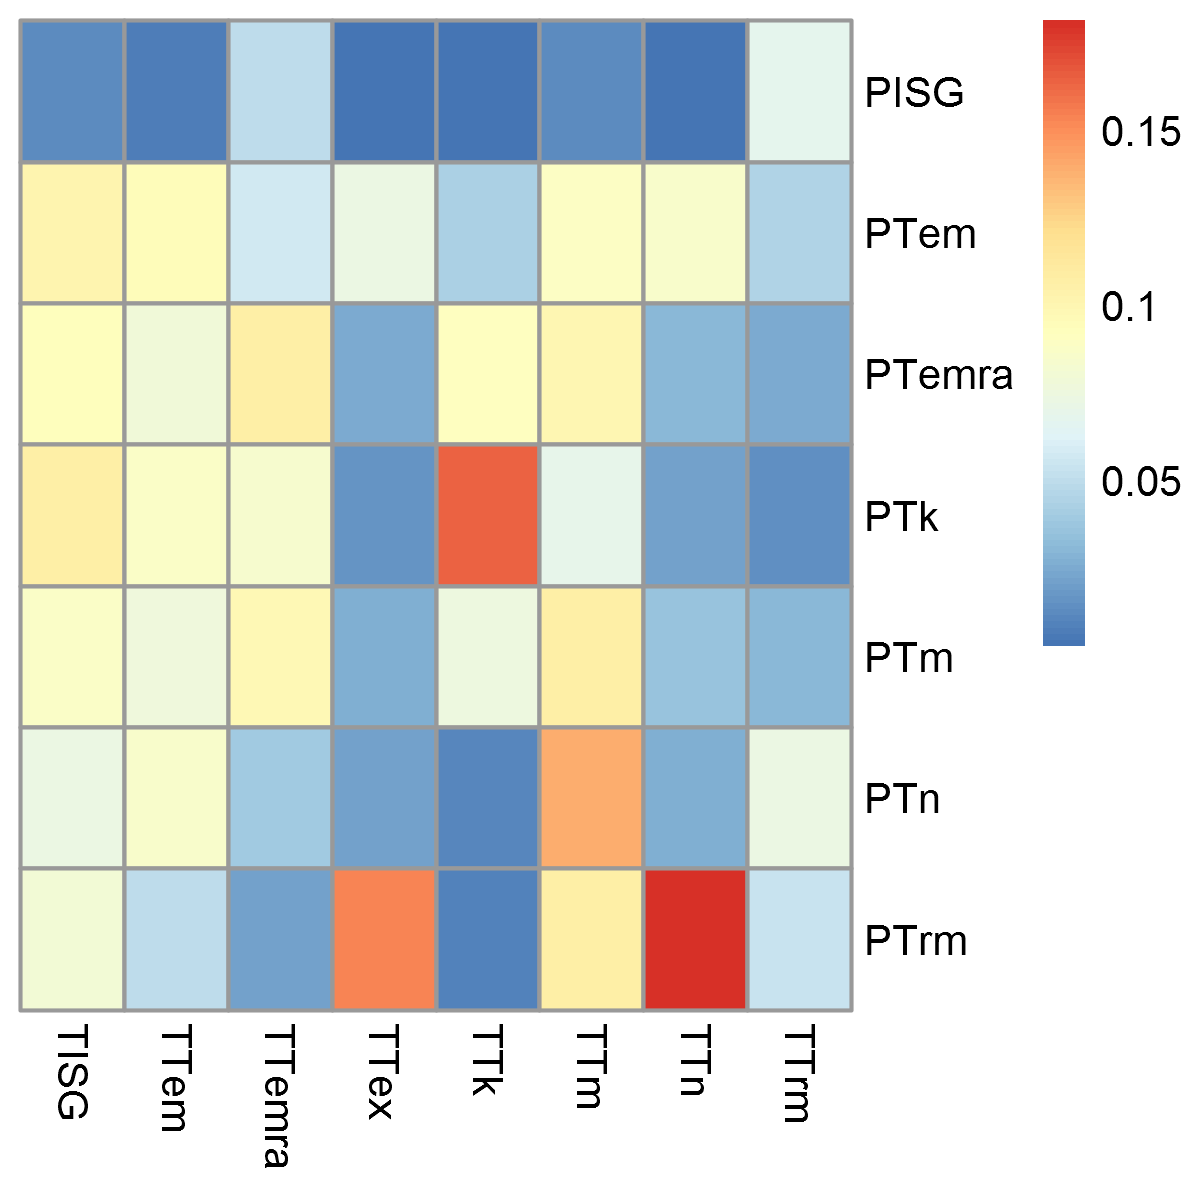

In [266]:
options(repr.plot.width = 4, repr.plot.height = 4)
a = mat/rowSums(mat)
a = a%*%a#%*%a
pheatmap(a, cluster_rows = FALSE, cluster_cols = FALSE, color = colorRampPalette(c('grey95', 'red'))(100))


b = a[substring(rownames(a), 1, 1) == 'P',substring(colnames(a), 1, 1) == 'T'] #%>% t()
#b = apply(b, 1, function(x) x/sum(x)) %>% t()
pheatmap(b, cluster_rows = FALSE, cluster_cols = FALSE)

In [267]:
mat2 = mat
mat2[!is.na(mat2)] = 0
for (curr in ids) {
    tcra = sub %>% filter(pheno_diffuse == curr) 
    tcra = tcra$cloneID
    mat2[curr, curr] = length(tcra)
    }

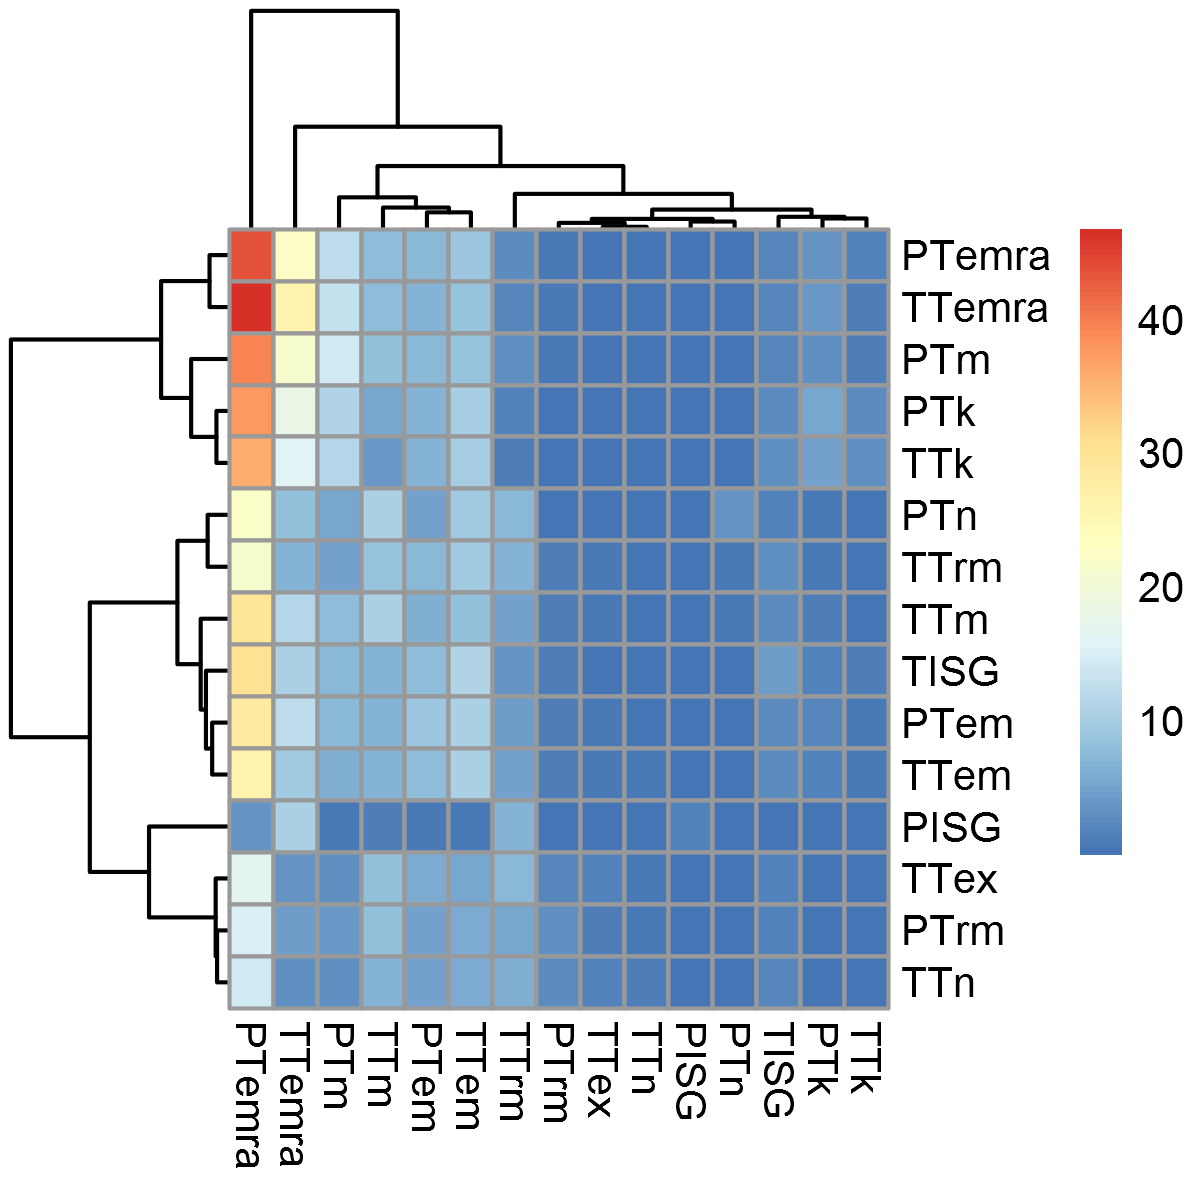

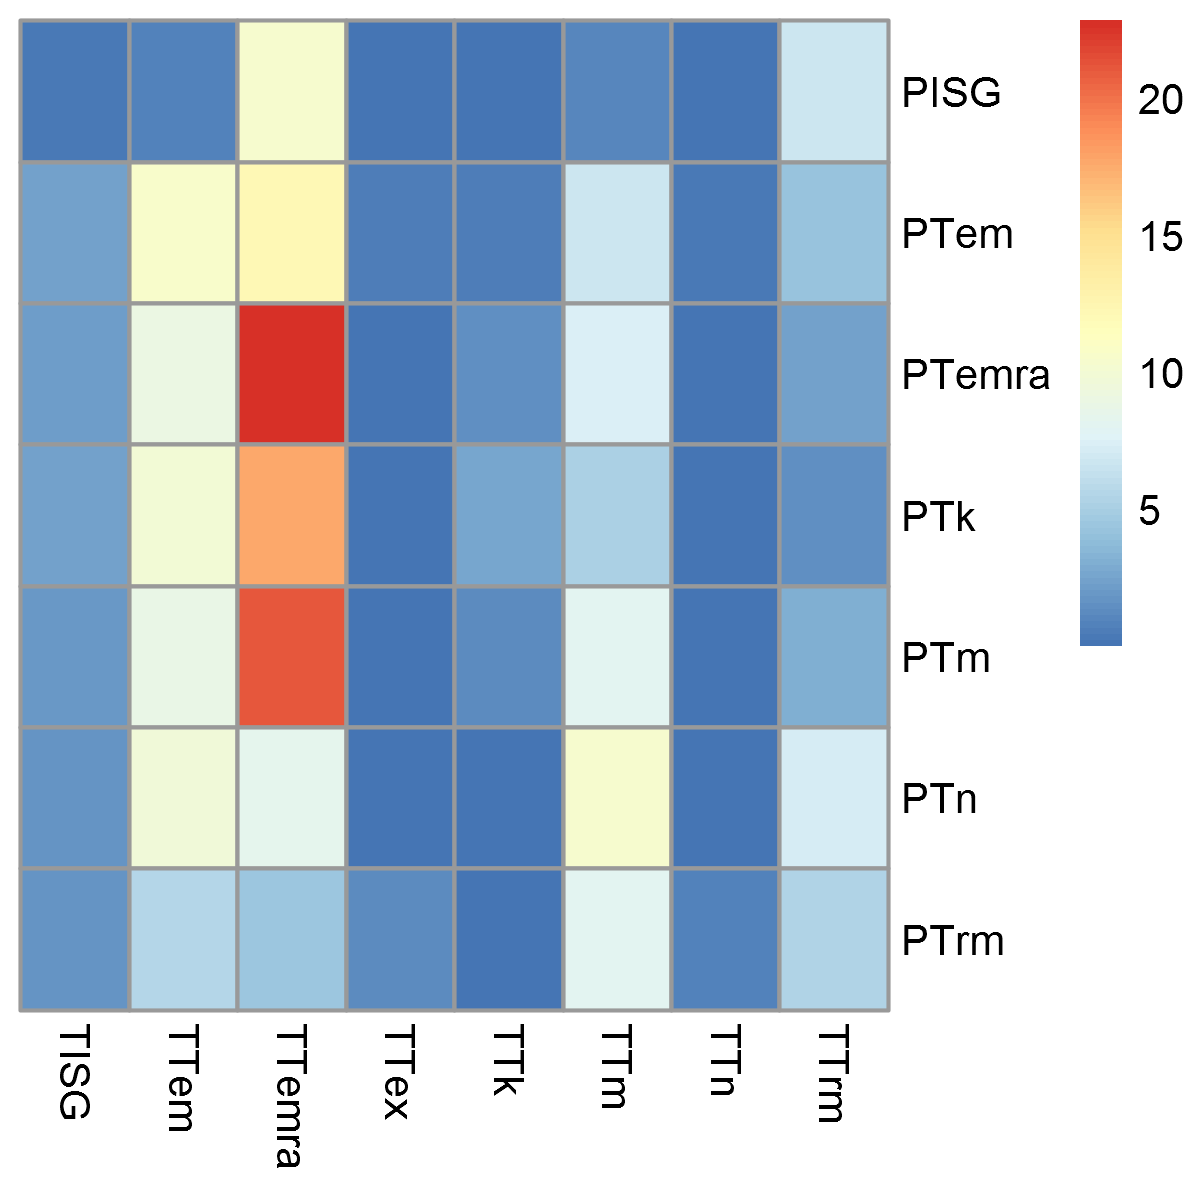

In [268]:
c = a %*%mat2
pheatmap(c)

d =  c[substring(rownames(c), 1, 1) == 'P',substring(colnames(c), 1, 1) == 'T'] #%>% t()
pheatmap(d, cluster_rows = FALSE, cluster_cols = FALSE)

In [258]:
d

,TISG,TTem,TTemra,TTex,TTk,TTm,TTn,TTrm
PISG,1.919996,5.155751,15.11504,3.061129,0.3015886,4.91079,0.2352584,24.02215
PTem,16.767451,56.308857,26.24122,28.447941,3.8199289,39.64795,4.1962477,24.01963
PTemra,14.061904,47.126079,34.15509,19.690915,6.2540352,37.79127,1.8008178,16.68707
PTk,14.830857,48.431349,31.06108,18.115111,10.3673943,32.42408,1.2778356,13.45903
PTm,13.626119,46.582000,32.86368,20.016805,5.3340577,39.26561,2.1781039,18.40818
PTn,11.355338,50.048388,17.29946,19.594216,1.1721579,48.41044,1.4996100,35.13057
PTrm,16.256599,42.806619,14.43339,41.402400,1.0770294,49.00838,11.0156862,29.17053


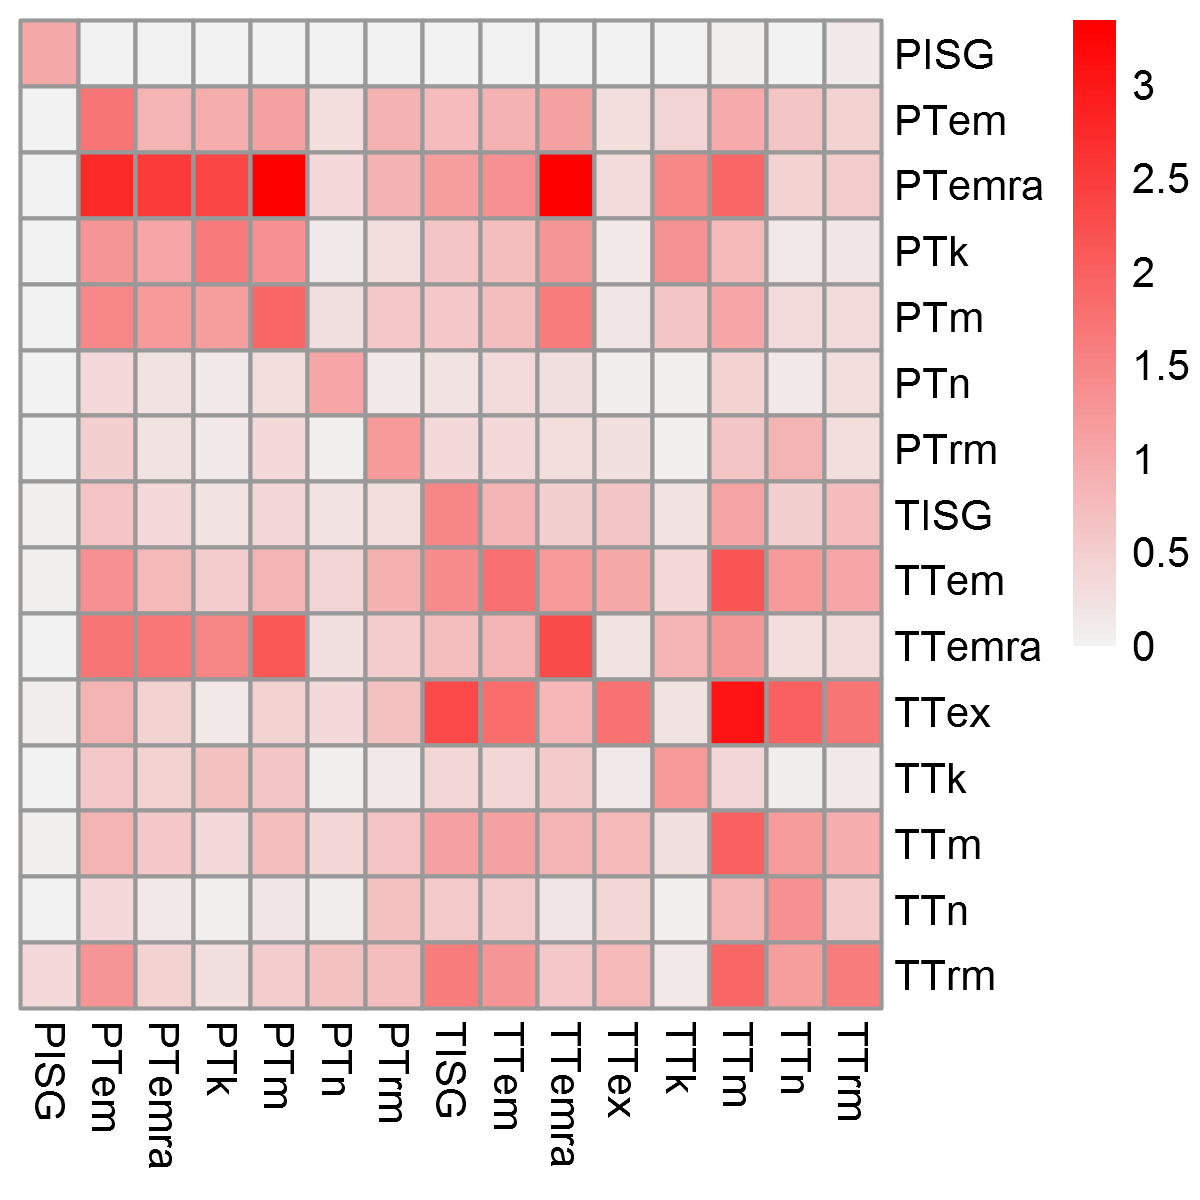

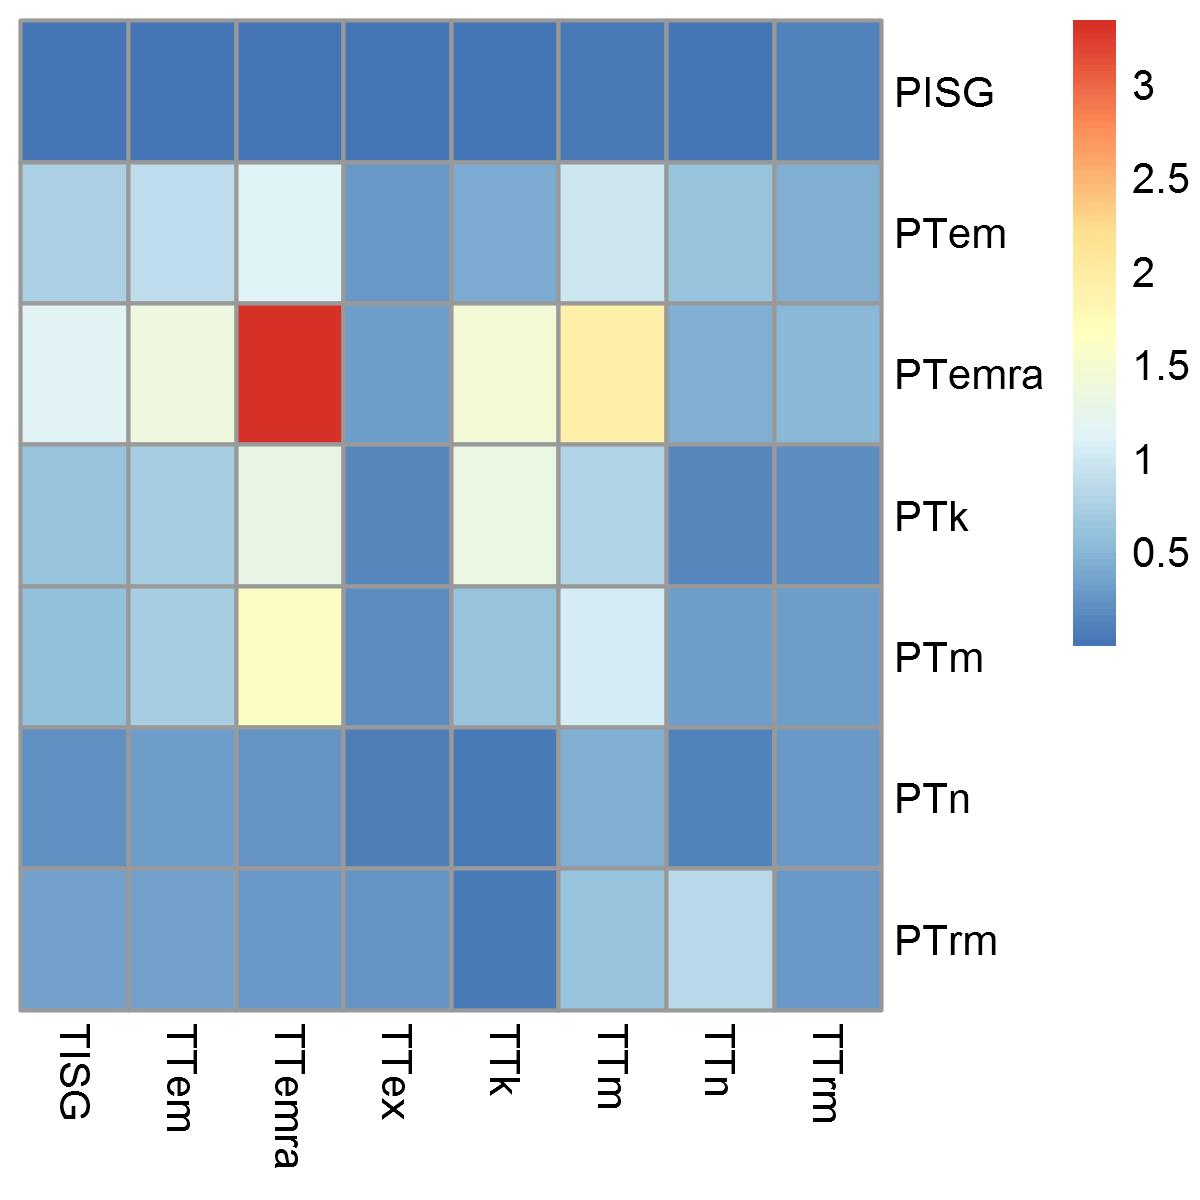

In [217]:
b/rowSums(b)

,TISG,TTem,TTemra,TTex,TTk,TTm,TTn,TTrm
PISG,0.1664985,0.1245885,0.04727262,0.07239669,0.01209929,0.1899928,0.11050480,0.27664682
PTem,0.1343557,0.1446208,0.19291231,0.06147370,0.08645610,0.1908174,0.10441644,0.08494755
PTemra,0.1212428,0.1355994,0.25278669,0.04622040,0.12158480,0.1881419,0.06839833,0.06602575
PTk,0.1246197,0.1385003,0.23290287,0.04544527,0.16169355,0.1754403,0.06055846,0.06083946
PTm,0.1218457,0.1360326,0.24451070,0.04816567,0.11133374,0.1920336,0.07595736,0.07012067
PTn,0.1361425,0.1521046,0.15868878,0.06744025,0.05098311,0.2208579,0.09490161,0.11888121
PTrm,0.1327040,0.1310740,0.11862349,0.08169725,0.03741272,0.2037065,0.19034964,0.10443245


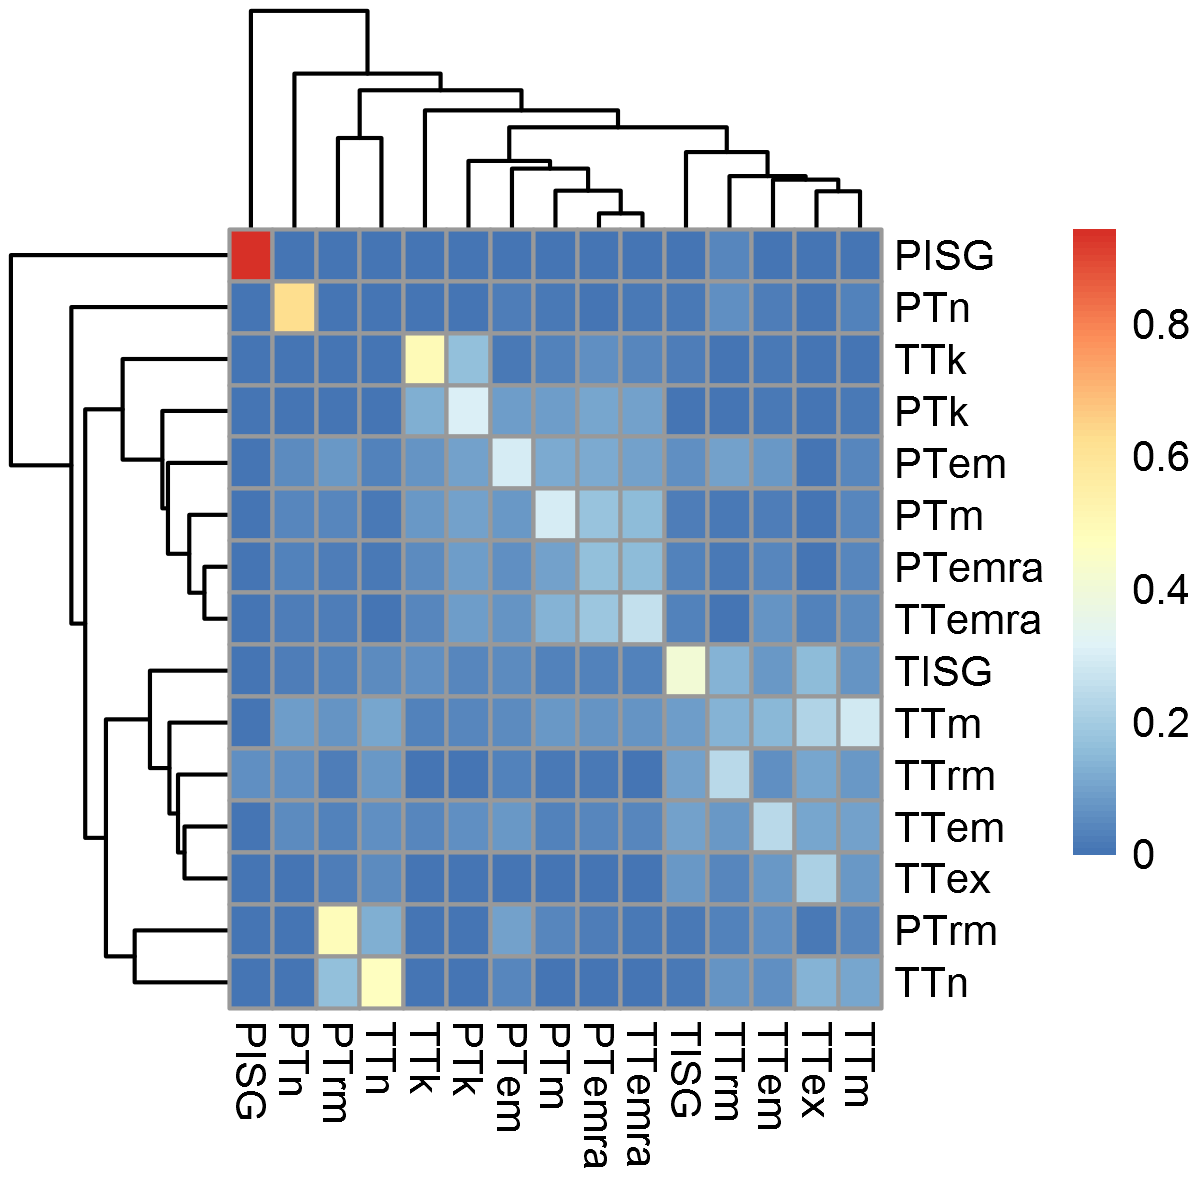

In [215]:
b = a#[substring(rownames(a), 1, 1) == 'T',substring(colnames(a), 1, 1) == 'P']
b = apply(b, 1, function(x) x/sum(x))
pheatmap(b)

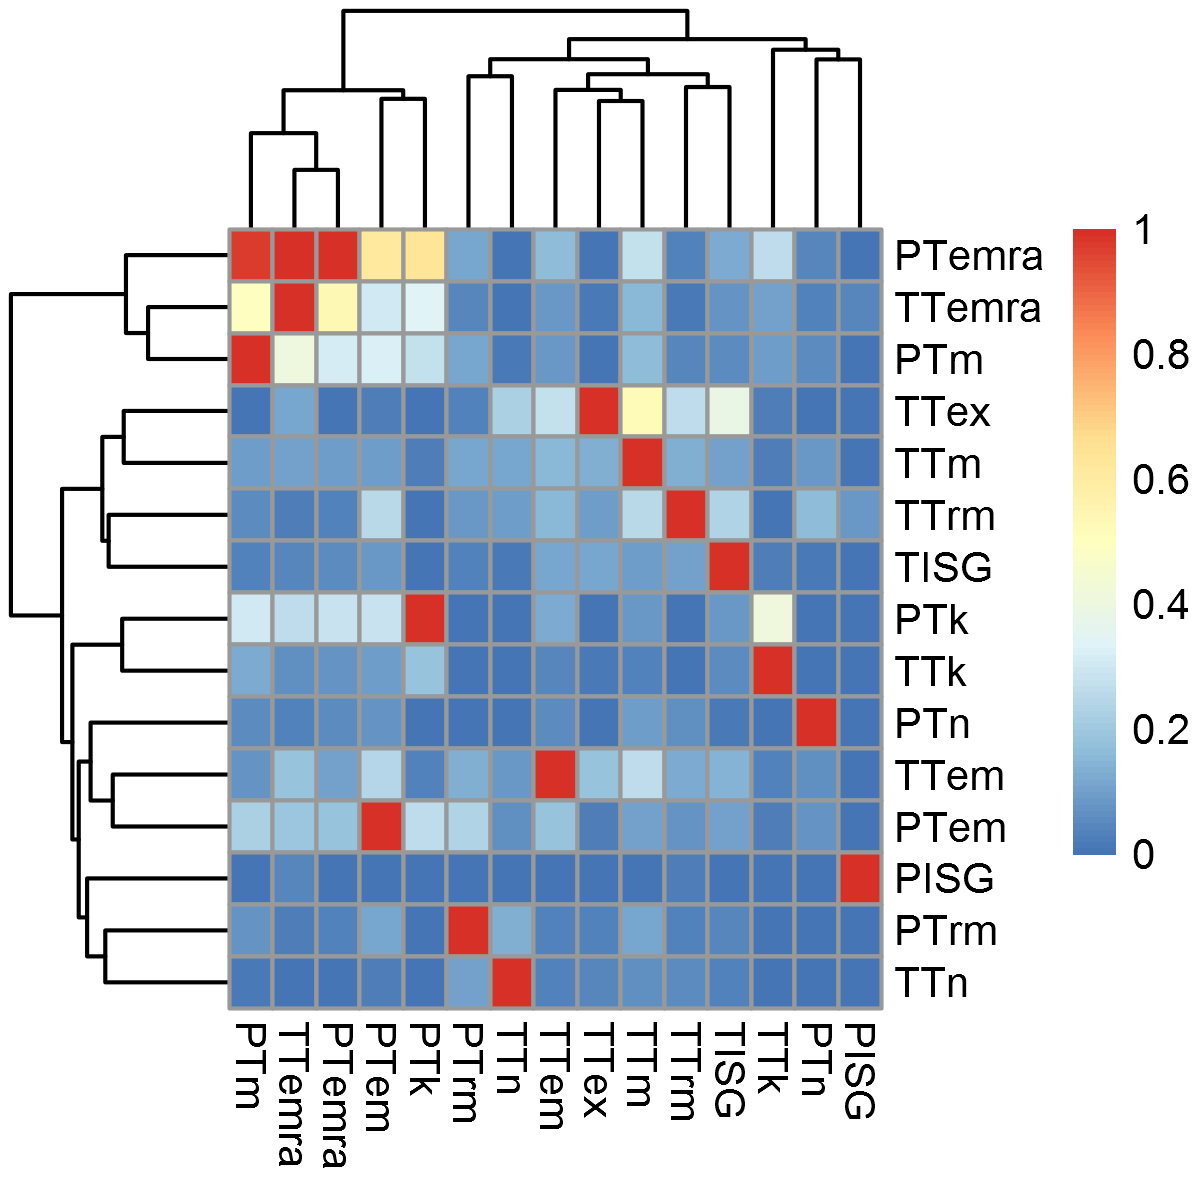

In [97]:
pheatmap(mat)

In [25]:
tab = table(sub$cloneID, sub$pheno_diffuse)
tab = tab[rowSums(tab) > 3,] 
tab = t(tab/rowSums(tab))

In [26]:
a = (mat2)^5
matrix = a%*%tab %>% t()
pheatmap(matrix/rowSums(matrix), show_rownames = FALSE,
         , show_colnames = TRUE)

ERROR: Error in eval(expr, envir, enclos): object 'mat2' not found
